# Линейные модели

Лабораторная работы №2
Вяткина Арина
Минеева Анна
РИ-471223

## Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

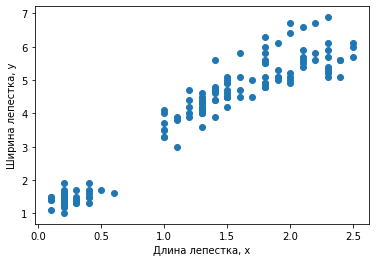

In [720]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
from scipy.optimize import minimize_scalar
from sklearn.linear_model import LinearRegression

data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
plt.scatter(x, y)
# plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости длины листа $y$ от ширины листа $x$ прямой линией $y = w_0 + w_1 * x$:

$$E(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 \cdot x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – длина и ширина листа ириса для $i$-ого объекта в наборе данных.

In [721]:
def square_error(w0, w1):
    n = len(x)
    mistakes = 0
    for i in range(n):
        mistakes += ((y[i] - (w0 + w1 * x[i])) ** 2) 
    mistakes = mistakes * 1/n
    return mistakes

In [722]:
# Пример вывода
print(square_error(5, -1))

6.2484


Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

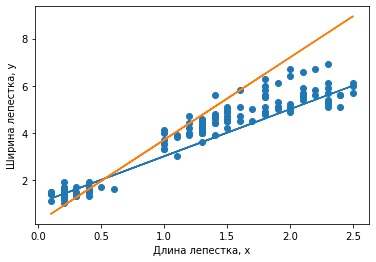

In [723]:
# Анонимная функция:
lineFunc = lambda x, w0, w1: w0 + w1 * x
plt.scatter(x, y)
plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
# Первая прямая
plt.plot(x, lineFunc(x, 1, 2))
# Вторая прмяая 
plt.plot(x, lineFunc(x, 0.2, 3.5))
# plt.show()

Построили две прямые. Видим, что они не показывают зависмость ширины листа от его длины.

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

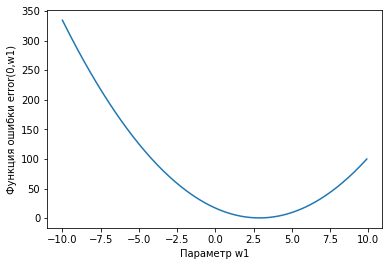

In [728]:
w0 = 0
w = np.arange(-10.0, 10.0, 0.1)
error = [square_error(w0,w1) for w1 in w]
plt.xlabel('Параметр w1')
plt.ylabel('Функция ошибки error(0,w1)')
plt.plot(w, error)

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (0, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [725]:
def error_def(w1):
    return square_error(0, w1)

optimize = minimize_scalar(error_def, bounds=(-10, 10))
# Вычисляем оптимальное значение для параметра w1
w1_opt = optimize.x
w1_opt

2.874706446598089

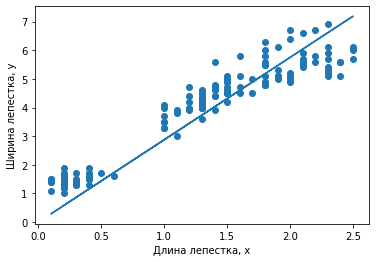

In [726]:
# Строим прямую,соответствующую значениям параметров ( 𝑤0 ,  𝑤1 ) = (0,  𝑤1_𝑜𝑝𝑡 )
plt.scatter(x, y)
plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
plt.plot(x, lineFunc(x, 0, w1_opt))
# plt.show()

## Линейная классификация

Рассмотрим в работе способы построения линейной модели классификации.

Линейный классификатор представляет собой линейную модель, разделяющую два класса (-1, 1). Линейная модель описывается следующей формулой $\langle \omega, x \rangle + b = y$. Вектор весов $\omega$ - вектор нормали этой линейно модели. При $y = 0$, все точки $x$ принадлежат этой разделяющей прямой, при $y > 0$ объеты $x$ лежат с той стороны прямой линии, куда смотрит вектор весов $\omega$, при $y < 0$ с другой стороны прямой линии. Таким образом линейная модель разделяет все объекты на положительный и отрицательные, причем чем дальше объект лежит от прямой, тем большее абсолютное значение он имеет.

Необходимо ввести обозначение отступа:

$$M = y \langle \omega, x \rangle$$

Таким образом, если объект будет лежать со стороны своего класса (классифицироваться правильно), то $M$ всегда будет иметь положительное значение. В случае неправилной классификации отступ будет отрицательным.

Введем несколько loss-функцию, которые будет оптимизировать:

1. логистическая: $$\bar L(M) = \ln(1+ \exp(-M))$$

2. экспоненциальны: $$\bar L(M) = \exp(-M)$$

3. кусочно-линейная: $$\bar L(M) = max(0, 1-M))$$

Таким образом для каждого объекта будет вычислена его собственный штраф. Чтобы получить полную функцию потеря - просто проссумируем штрафы всех объектов.
Таким образом у нас будет функция, подсчитывающая штрафы для конкретной модели. Необходимо ее оптимизировать, для этого надо вычислить градиент и начать движение (изменение весов модели $\omega$) в сторону антиградиента с некоторым постоянным шагом.

## Задача
1. Написать функцию расчета функции потерь (loss-функции) и градиента функции. (выбрать любую функцию)
2. Реализовать градиентный спуск по всем данным.
3. Реализовать стохастический градиентный спуск.

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Задача 1
Напишите две функции, которые будут получать на вход вектор весов, признаки и целевую переменную. Функции должны возвращать суммарную ошибку и градиент.

In [11]:
def loss(c_w0, c_w1, c_w2, x, y):
    # скалярное произведение
    M = y * (c_w2 * x[:,1] + c_w1 * x[:,0] + c_w0)
    # логистическая функция
    return sum(np.log(1 + np.exp(- M)))

def grad_loss(c_w0, c_w1, c_w2, x, y):
    M = y * (c_w2 * x[:,1] + c_w1 * x[:,0] + c_w0)
    # считаем частные производные от функции loss для вычисления весов w0, w1, w2
    div_w0 = sum(- 1 / (1 + np.exp(- M)) * y * np.exp(- M))
    div_w1 = sum(- 1 / (1 + np.exp(- M)) * y * x[:,0] * np.exp(- M))
    div_w2 = sum(- 1 / (1 + np.exp(- M)) * y * x[:,1] * np.exp(- M))

    return div_w0, div_w1, div_w2

In [12]:
# функция классификатора
def classificate (w0, w1, w2, x):
        return w0 + w1 * x[:,0] + w2 * x[:, 1]

### Задача 2. Реализация метода градиентного спуска
Постройте анимационную гифку схождения вашей линейной модели к данным. Подпишите loss к каждому кадру на гифке.

Дан набор данных.
Проведена нормализация данных по признакам и выставлены классы (-1, 1).

Проведите случайную линейную модель, постройте ее на графике и вычислите для нее суммарную функцию ошибки.
Проверьте, что суммарная функция ошибки считается правильно.

In [13]:
# Инициализация данных для нашей модели
# make_blobs() - генерация капель точек с гауссовым распределением
X, Y = make_blobs(n_samples=100, n_features=2, centers=2 ,cluster_std=1, random_state=17, center_box=(-10, 10))
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
X[:,0] = 2 * (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min()) - 1
X[:,1] = 2 * (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) - 1 


Y[Y == 0] = -1
w0, w1, w2 = 0.5, 1, 1
# Шаг обучения
sigma = 1e-2

<Figure size 720x720 with 0 Axes>

0.5156967116192509
(0.038199926831988466, 0.048673551533773216, 0.2188724878623863)


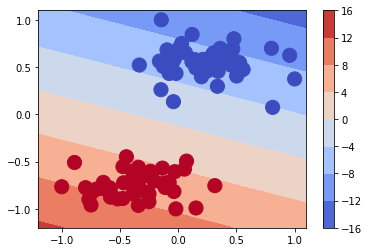

In [705]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

print(loss(w0, w1, w2, X, Y))
print(grad_loss(w0, w1, w2, X, Y))

# Строим сетку для графика
x1, x2 = np.mgrid[min(X[:,0]) - 0.2:max(X[:,0]) + 0.2:0.1,
                  min(X[:,1]) - 0.2:max(X[:,1]) + 0.2:0.1]
# Каждую точку сетки прогоняем через наш классификатор, который определяет класс точки    
y = classificate(w0, w1, w2, np.concatenate((np.expand_dims(x1.ravel(), axis = 1), x2.reshape((-1,1))), axis = 1))
y = y.reshape(x1.shape)

plt.contourf(x1, x2, y, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

# Вычисляем смещение
delta_w0, delta_w1, delta_w2 = grad_loss(w0, w1, w2, X, Y)
# Из текущего значения веса вычитаем полученное значение смещения, умноженное на шаг обучения
delta_w0, delta_w1, delta_w2 = grad_loss(w0, w1, w2, X, Y)
w0 -= sigma * delta_w0
w1 -= sigma * delta_w1
w2 -= sigma * delta_w2

### Задача 3. Реализация стохастического градиентного спуска.
Используйте на каждой итерации не весь набор данных, а $n$ случайных объектов из выборки. Оформите результат схождения вашей модели в виде гифки.

In [711]:
import random
from random import randint
# Генерируем 2 случайных числа от 0 до 100
n = random.randint(0,100)
n1 = random.randint(0,100)
w0, w1, w2 = 0.5, 1, 1

83
100
4.010676785518424
(0.962671257740654, 0.3913507553422002, 1.4288988375708704)


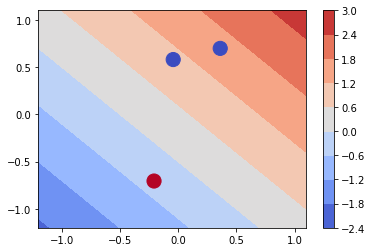

In [712]:
print(n)
print(n1)
print(loss(w0, w1, w2, X[min(n,n1):max(n,n1):6], Y[min(n,n1):max(n,n1):6]))
print(grad_loss(w0, w1, w2, X[min(n,n1):max(n,n1):6], Y[min(n,n1):max(n,n1):6]))


x1, x2 = np.mgrid[min(X[:,0]) - 0.2:max(X[:,0]) + 0.2:0.1,
min(X[:,1]) - 0.2:max(X[:,1]) + 0.2:0.1]

y = classificate(w0, w1, w2, np.concatenate((np.expand_dims(x1.ravel(), axis = 1), x2.reshape((-1,1))), axis = 1))
y = y.reshape(x1.shape)

plt.contourf(x1, x2, y, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.scatter(X[min(n,n1):max(n,n1):6,0], X[min(n,n1):max(n,n1):6,1], s = 200, c = Y[min(n,n1):max(n,n1):6], cmap=cmap)

delta_w0, delta_w1, delta_w2 = grad_loss(w0, w1, w2, X[min(n,n1):max(n,n1):6], Y[min(n,n1):max(n,n1):6])
w0 -= sigma * delta_w0
w1 -= sigma * delta_w1
w2 -= sigma * delta_w2